In [1]:
""" 

This LSTM Model will capture the downwards and upwards trends of the Google Stock Price 

Data Set Description :

5 Years of Stock Dataset from 2012 to 2016 :

Need to predict the first month of 2017 Stock price. Not the exactly but Need to Predict Downwards and Upwards stock price

"""

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt



In [2]:
"""

Importing the datasets

"""

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

"""
Let's select the correct columns we need, To do that Will use iloc method which accepts rows and Columns in a range 

And also as a single value. I am taking range here instead of selecting the colum because I am creating the Numpy array

which will allow us to have numpy array of just one column which is column "OPEN" in the dataset. To make a simple iloc

dataset a numpy array which just need to add ".values"

Training_Set will be the dataset where I will be training my LSTM model. 

"""

training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
"""

Checking for Null values in the actual dataset 

"""

dataset_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
"""

For Feature Scaling, I will be using Normalisation because LSTM uses sigmoid activation function and whenever you are using

sigmoid as your output activation function. Apply Normalisation technique for scaling the observations.

"""


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
""" 
Let's create the Data Structure with 60 Time stamps and 1 output _
60 Time stamps means at each time T, the RNN is going to look at the 60 Stock prices before time T. That is stock
prices between 60 days before time T and time T
And Based on the Trends It is capturing, During these 60 previous time steps It will try to predict the next output.
So 60 time steps of the Past information from which our RNN is going to learn and understand some correlation. or some
trends and based on its understanding, It will predict the next output. That will be Stock Prize at time (t+1)
We can do some experiments with the number of time steps.
I tried 1 time step and also other time step. Where taking 1 time step led to overfitting and Model did not learn anything
. Also experimented with 20 Time steps which was also not good. 
Once again. 20 Time steps, 1 Time steps etc are only previous values which we are taking. 

"""


"""
Now Will create the input and output. X_Train will be the input to Neural network and y_train is going to be output to neural network
So for Every Stock prices, X_Train (the input) will contain 60 previous Stock Prices and y_train will contain the next
stock price
Hence. Let's create X_train and y_train and Will consider them as empty list for now And then Populate the X_Train with 60 Previous stock price
And y_train will be next stock price.
"""

X_train = []
y_train = []


"""
Using a for loop to populate
60 is the index of stock prices we will start training our neural network to the last index of the training dataset
which is 1258
"""
for i in range(60, 1258):
    
    """
    And Will append the 60 previous stock prices into new X_Train dataset which will be used for training
    Zero means I am taking index zero and this new X_Train has only one column which is index zero
    """
    X_train.append(training_set_scaled[i-60:i, 0])
    
    """
    As Already mentioned above, in y_train we just need stock price at time (t+1)
    """
    y_train.append(training_set_scaled[i, 0])
    
    
X_train, y_train = np.array(X_train), np.array(y_train)




In [8]:
"""
Number of predictors, We want to use. Will add few new Dimensions. And To do that Will use Reshape function.

In Numpy array, Anytime We want to add new Dimensions in numpy array function. Will use Reshape function.


This function accepts :

1. What we want to reshape

2. New Structure we want our numpy array X_train to have


From Keras Documentation 


Call arguments

inputs: A 3D tensor with shape [batch, timesteps, feature].

Batch size. = Total number of observations from 2012 to 2016,

Timesteps = 60

Feature = 1
"""


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
X_train.shape

(1198, 60, 1)

## Building RNN Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()

In [12]:
"""
Adding first LSTM layer and some Drop out layers

Setting Return sequence parameter to True because I am adding another stack layer

"""
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [13]:
"""

Adding second layer

"""

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
"""
Third Layer
"""

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
"""

Fourth Layer

"""

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [16]:
"""

Output Layer

"""

regressor.add(Dense(units = 1))

In [17]:
"""

Compiling the RNN 

"""

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
"""

Fitting and Training on the Training set

"""

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0355
Epoch 2/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0046
Epoch 5/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0055
Epoch 11/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0037
Epoch 13/100


In [20]:
"""

Making Predictions on the test dataset

"""

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
"""
Getting the Predicted Stock Price of 2017

"""


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

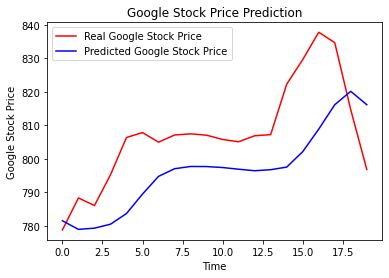

In [22]:
""" 

Let's Visualise the Result

"""

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()